# CFA

# Financial Statement Analysis

In [62]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

In [ ]:
# to get remote date 
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [11]:
yf.pdr_override()

In [13]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)
df = data.get_data_yahoo('MS', start, end)

# f = web.DataReader('F', 'google', start, end)

[*********************100%***********************]  1 of 1 downloaded


In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2009-12-31 to 2016-12-30
Data columns (total 6 columns):
Open         1763 non-null float64
High         1763 non-null float64
Low          1763 non-null float64
Close        1763 non-null float64
Adj Close    1763 non-null float64
Volume       1763 non-null int32
dtypes: float64(5), int32(1)
memory usage: 89.5 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,29.490000,29.770000,29.440001,29.600000,25.955486,9876900
2010-01-04,30.700001,31.969999,30.629999,30.910000,27.104185,20371000
2010-01-05,31.010000,32.130001,30.930000,32.040001,28.095060,22523400
2010-01-06,31.969999,32.590000,31.790001,32.450001,28.454571,17028500
2010-01-07,32.459999,33.270000,32.270000,32.919998,28.866699,18693000


In [22]:
df[['Close']].plot(grid=True, figsize=(8,5))

In [21]:
# 时间序列
# 趋势策略
# df['42d'] = np.round(pd.rolling_mean(df['Close'], window=42), 2)
df['42d'] = np.round(df['Close'].rolling(window=42, center=False).mean(), 2)
df['252d'] = np.round(df['Close'].rolling(window=252, center=False).mean(), 2)

In [23]:
df[['42d','252d','Close']].plot(grid=True, figsize=(8,5))

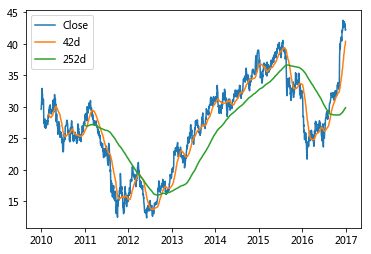

In [33]:
df.tail()
plt.plot(df['Close'])
plt.plot(df['42d'])
plt.plot(df['252d'])
plt.legend()
plt.show()

In [40]:
df['42-252']=df['42d'] - df['252d']
# df

In [45]:
# 投资体制 
SD=2
df['Regime'] = np.where(df['42-252'] > SD, 1, 0)
df['Regime'] = np.where(df['42-252'] < -SD, -1, df['Regime'])
# df['Regime'].value_counts()
df['Regime'].value_counts()

 0    668
 1    648
-1    447
Name: Regime, dtype: int64

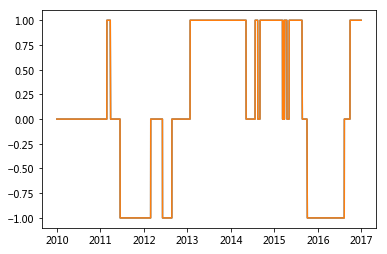

In [47]:
plt.plot(df['Regime'])
plt.show()

In [48]:
# sp500=wb.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')
# sp500.info()

In [49]:
# https://zhuanlan.zhihu.com/p/34643533 

In [50]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [76]:
df = pd.DataFrame(columns=["a", "b","c"])
s = pd.Series([1,2,3])
a = np.array([1,2,3])
df = df.append({"a":1, "b":2, "c":3}, ignore_index=True)
df


,a,b,c
0,1,2,3


In [ ]:
IFRS

In [ ]:
Assets
noncurrent assets
intangible
property, plant and equipment
leasing and rental assets
investment property
Equity-accounted investments
other equity investments
financial services receivables
other receivables and financial assets
noncurrent tax receivables
deferred tax assets

current assets
invertories
trade receivables
financial services receivables
other receivables and financial assets
current tax receivables
marketable securities
cash and cash equivalents
assets held for sale

equity
subscribed capital
capital reserves
retained earnings
equity of parent company shareholders
minority interests

liabilities
noncurrent liabilities
noncurrent financial liabilities
other noncurrent liabilities
deferred tax liabilities
provisions for pensions
provisions for taxes
other noncurrent provisions

current liabilities
current financial liabilities
trade payables
current tax payables
other current liabilities
provisions for taxes
other current provisions
liabilities with assets held for sale




In [ ]:
# https://zhuanlan.zhihu.com/p/31848818